In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.5)


import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('./pima_indians/diabetes.csv')

In [3]:
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_all['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


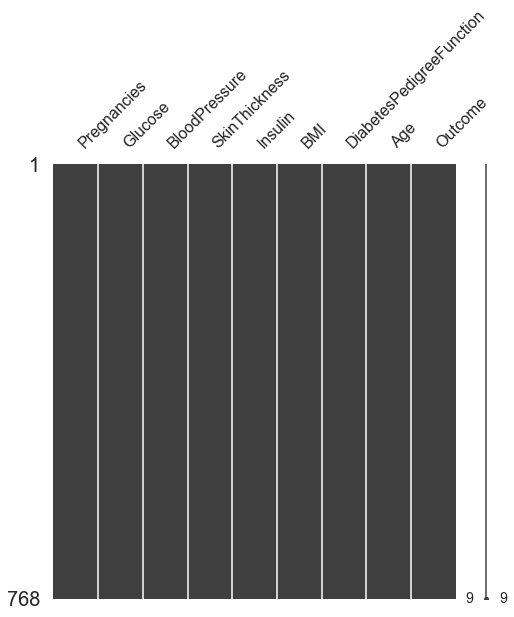

In [6]:
msno.matrix(df_all, figsize=(8,8))

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
X = df_all.iloc[:,:-1]
y = df_all.iloc[:,-1]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [12]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf_pred = lr_clf.predict(X_test)

In [13]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차행렬:\n{}'.format(confusion))
    print('\n정확도: {0:.4f}, 정밀도: {0:.4f}, 재현율(민감도): {0:.4f}, f1스코어: {0:.4f}, roc_auc: {0:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [14]:
get_clf_eval(y_test, lr_clf_pred)

오차행렬:
[[98  9]
 [18 29]]

정확도: 0.8247, 정밀도: 0.8247, 재현율(민감도): 0.8247, f1스코어: 0.8247, roc_auc: 0.8247


In [15]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

In [34]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], label='precision')
    plt.plot(thresholds, recall[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('precision and recall value')
    plt.legend()
    
    

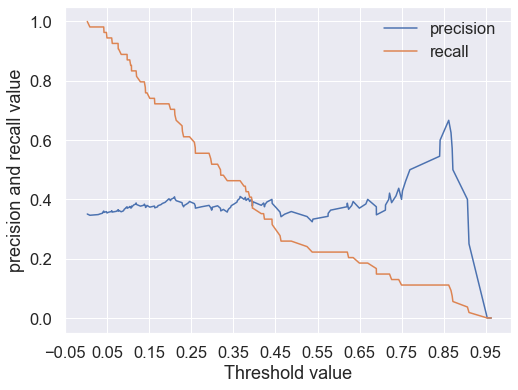

In [35]:
precision_recall_curve_plot(y_test, pred_proba_c1)

In [18]:
df_all.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

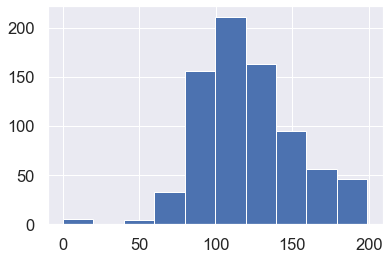

In [19]:
plt.hist(df_all['Glucose'], bins=10 )

In [20]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = df_all['Glucose'].count()

for feature in zero_features:
    zero_count = df_all[df_all[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트 0.65 %
BloodPressure 0 건수는 35, 퍼센트 4.56 %
SkinThickness 0 건수는 227, 퍼센트 29.56 %
Insulin 0 건수는 374, 퍼센트 48.70 %
BMI 0 건수는 11, 퍼센트 1.43 %


In [21]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = df_all['Glucose'].count()

for feature in zero_features:
    zero_count = df_all[df_all[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/df_all.shape[0]))

Glucose 0 건수는 5, 퍼센트 0.65 %
BloodPressure 0 건수는 35, 퍼센트 4.56 %
SkinThickness 0 건수는 227, 퍼센트 29.56 %
Insulin 0 건수는 374, 퍼센트 48.70 %
BMI 0 건수는 11, 퍼센트 1.43 %


In [22]:
mean_zero_features = df_all[zero_features].mean()
df_all[zero_features] = df_all[zero_features].replace(0, mean_zero_features)

In [23]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = df_all['Glucose'].count()

for feature in zero_features:
    zero_count = df_all[df_all[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/df_all.shape[0]))

Glucose 0 건수는 0, 퍼센트 0.00 %
BloodPressure 0 건수는 0, 퍼센트 0.00 %
SkinThickness 0 건수는 0, 퍼센트 0.00 %
Insulin 0 건수는 0, 퍼센트 0.00 %
BMI 0 건수는 0, 퍼센트 0.00 %


In [24]:
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [25]:
X = df_all.iloc[:,:-1]
y = df_all.iloc[:, -1]

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [27]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [28]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)


In [30]:
lr_clf.fit(X_train, y_train)
lr_clf_pred = lr_clf.predict(X_test)
get_clf_eval(y_test, lr_clf_pred)

오차행렬:
[[89 11]
 [25 29]]

정확도: 0.7662, 정밀도: 0.7662, 재현율(민감도): 0.7662, f1스코어: 0.7662, roc_auc: 0.7662


In [31]:
from sklearn.preprocessing import Binarizer

In [32]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        binerizer = Binarizer(threshold = thresholds)
        binerizer.fit(pred_preba_c1)
        customer_predict = binarizer.transfor(pred_preba_1)
        print('임계값:', custom_thresholds)
        get_clf_eval(y_test, custom_predict)

In [33]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

NameError: name 'pred_preba_c1' is not defined